In [55]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)


options(scipen = 999)

genre_data = read_csv("https://raw.githubusercontent.com/paulh777/dsci100prj/main/proposal/data_by_genres.csv")

#Select the columns relevant to research
popularity_data = genre_data %>%
    mutate(mode=as_factor(mode))%>%
    mutate(key=as_factor(key))%>%
    mutate(genres=as_factor(genres))

popularity_data %>% head(10)

Parsed with column specification:
cols(
  mode = col_double(),
  genres = col_character(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  liveness = col_double(),
  loudness = col_double(),
  speechiness = col_double(),
  tempo = col_double(),
  valence = col_double(),
  popularity = col_double(),
  key = col_double()
)



mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,21st century classical,0.9793333,0.1628833,160297.7,0.07131667,0.606833670,0.36160000,-31.514333,0.04056667,75.3365,0.1037833,27.83333,6
1,432hz,0.4947800,0.2993333,1048887.3,0.45067833,0.477761667,0.13100000,-16.854000,0.07681667,120.2857,0.2217500,52.50000,5
1,8-bit,0.7620000,0.7120000,115177.0,0.81800000,0.876000000,0.12600000,-9.180000,0.04700000,133.4440,0.9750000,48.00000,7
1,[],0.6514170,0.5290926,232880.9,0.41914607,0.205309190,0.21869585,-12.288965,0.10787156,112.8574,0.5136043,20.85988,7
1,a cappella,0.6765573,0.5389612,190628.5,0.31643357,0.003003441,0.17225414,-12.479387,0.08285144,112.1104,0.4482487,45.82007,7
1,abstract,0.4592100,0.5161667,343196.5,0.44241667,0.849666667,0.11806667,-15.472083,0.04651667,127.8858,0.3073250,43.50000,1
1,abstract beats,0.3421467,0.6230000,229936.2,0.52780000,0.333602612,0.09965333,-7.918000,0.11637333,112.4138,0.4935067,58.93333,10
1,abstract hip hop,0.2438541,0.6945709,231849.2,0.64623464,0.024231263,0.16854292,-7.349328,0.21425770,108.2450,0.5713909,39.79070,2
0,accordeon,0.3230000,0.5880000,164000.0,0.39200000,0.441000000,0.07940000,-14.899000,0.07270000,109.1310,0.7090000,39.00000,2


In [67]:
#Split
popularity_num = popularity_data%>%
    select(-key,-genres,-mode)

popularity_num
popularity_split = initial_split(popularity_num, prop = 0.5, strata = popularity)
popularity_training = training(popularity_split)
popularity_testing = testing(popularity_split)

acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.97933333,0.1628833,160297.7,0.07131667,0.606833670000,0.36160000,-31.514333,0.04056667,75.33650,0.1037833,27.833333
0.49478000,0.2993333,1048887.3,0.45067833,0.477761666667,0.13100000,-16.854000,0.07681667,120.28567,0.2217500,52.500000
0.76200000,0.7120000,115177.0,0.81800000,0.876000000000,0.12600000,-9.180000,0.04700000,133.44400,0.9750000,48.000000
0.65141702,0.5290926,232880.9,0.41914607,0.205309189511,0.21869585,-12.288965,0.10787156,112.85735,0.5136043,20.859882
0.67655730,0.5389612,190628.5,0.31643357,0.003003441440,0.17225414,-12.479387,0.08285144,112.11036,0.4482487,45.820071
0.45921000,0.5161667,343196.5,0.44241667,0.849666666667,0.11806667,-15.472083,0.04651667,127.88575,0.3073250,43.500000
0.34214667,0.6230000,229936.2,0.52780000,0.333602612000,0.09965333,-7.918000,0.11637333,112.41380,0.4935067,58.933333
0.24385406,0.6945709,231849.2,0.64623464,0.024231262920,0.16854292,-7.349328,0.21425770,108.24499,0.5713909,39.790702
0.32300000,0.5880000,164000.0,0.39200000,0.441000000000,0.07940000,-14.899000,0.07270000,109.13100,0.7090000,39.000000


In [74]:
#Tables Relevant to Research

popularity_num2 = popularity_training%>%
    mutate(duration_min=duration_ms/60000)%>%
    select(-duration_ms)

popularity_max = popularity_num2 %>%
    map_df(max, na.rm=TRUE)

popularity_min = popularity_num2 %>%
    map_df(min, na.rm=TRUE)

popularity_mean = popularity_num2 %>%
    map_df(mean, na.rm=TRUE)

popularity_median = popularity_num2 %>%
    map_df(median, na.rm=TRUE)

popularity_sd = popularity_num2 %>%
    map_df(sd, na.rm=TRUE)

    
popularity_max = popularity_max %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "variable",
        values_to = "max"
    )

popularity_min = popularity_min %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove1",
        values_to = "min"
    )

popularity_mean = popularity_mean %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove2",
        values_to = "mean"
    )

popularity_median = popularity_median %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove3",
        values_to = "median"
    )

popularity_sd = popularity_sd %>%
    pivot_longer(
        cols = acousticness:duration_min,
        names_to = "remove4",
        values_to = "standard_deviation"
    )


popularity_table = popularity_max %>%
bind_cols(popularity_min)%>%
bind_cols(popularity_mean)%>%
bind_cols(popularity_median)%>%
bind_cols(popularity_sd)%>%
select(variable,max,min,mean,median,standard_deviation)

popularity_table

variable,max,min,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
acousticness,0.9940000,0.000003480,0.40416275,0.33204284,0.31607085
danceability,0.9290000,0.082566667,0.53797323,0.54667870,0.14944731
energy,0.9943333,0.008876667,0.55819815,0.59188565,0.23319418
instrumentalness,0.9920000,0.000000000,0.21041756,0.08262827,0.26471075
liveness,0.9600000,0.023900000,0.19066738,0.17664873,0.09224219
loudness,-0.2530000,-33.962666667,-10.49610090,-9.36337500,5.27468909
speechiness,0.9462187,0.023800000,0.08276924,0.05962168,0.08003176
tempo,204.2120000,59.047500000,118.77898556,118.85421898,17.32637911
valence,0.9754000,0.003352500,0.49423813,0.50064246,0.20277890


In [ ]:
popularity_cat = popularity_data%>%
    

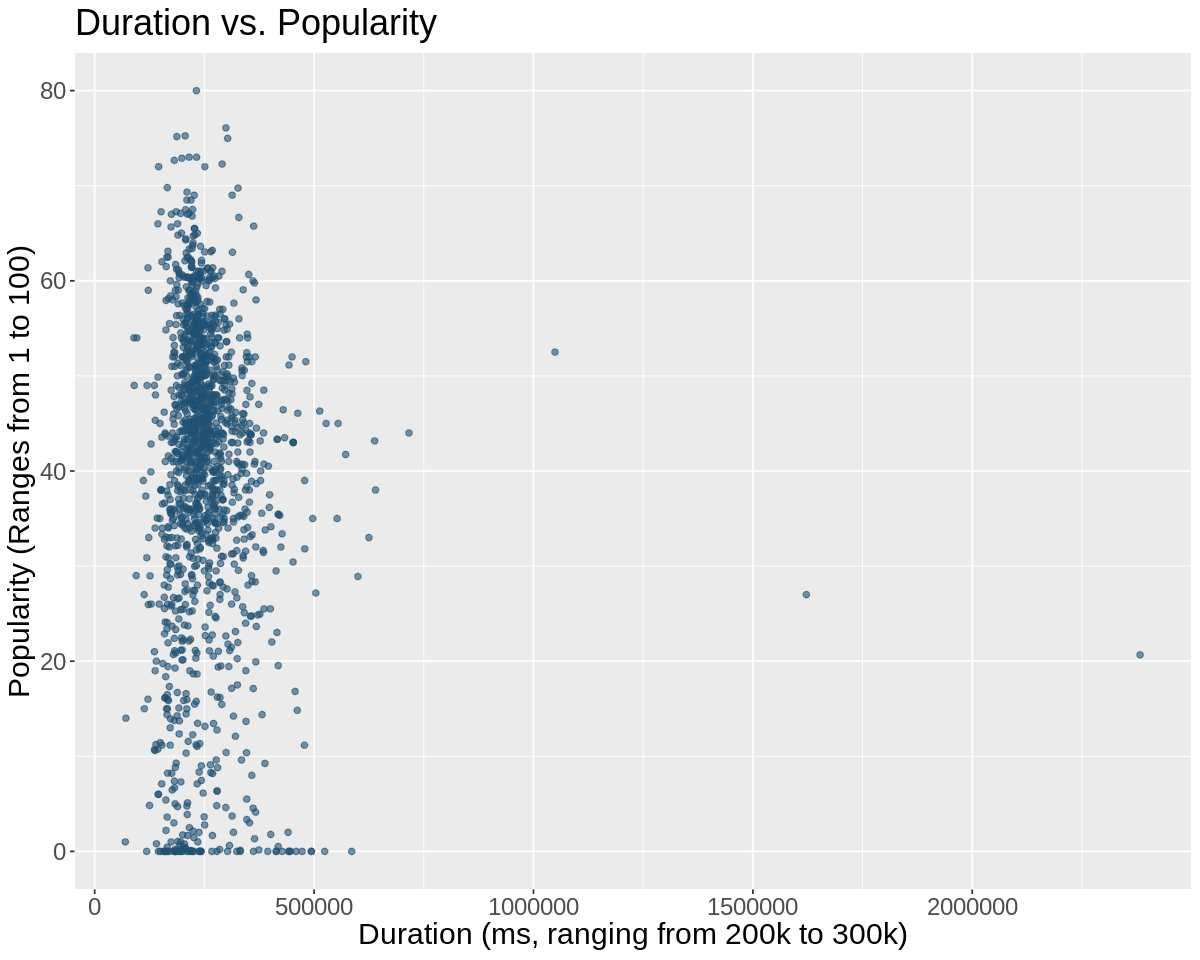

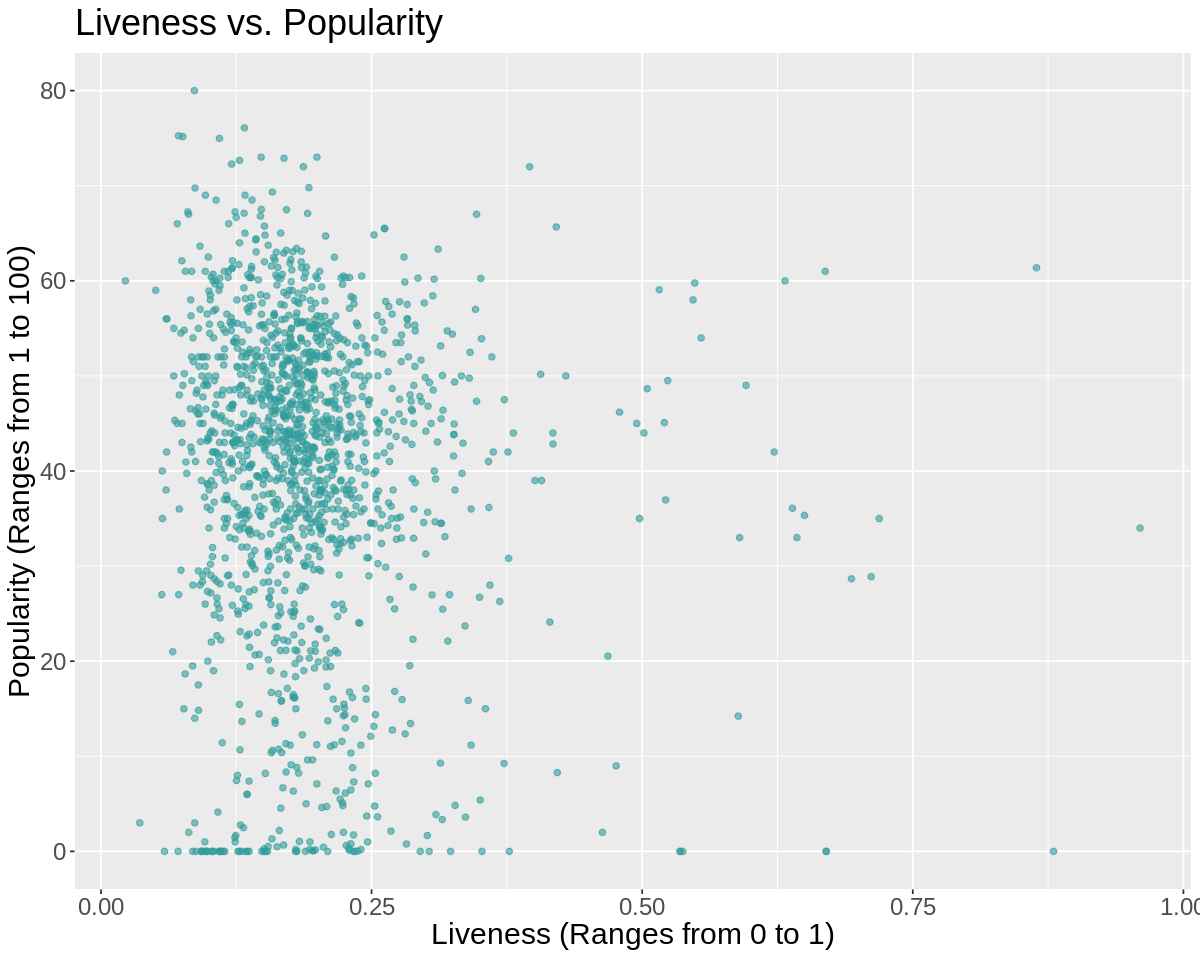

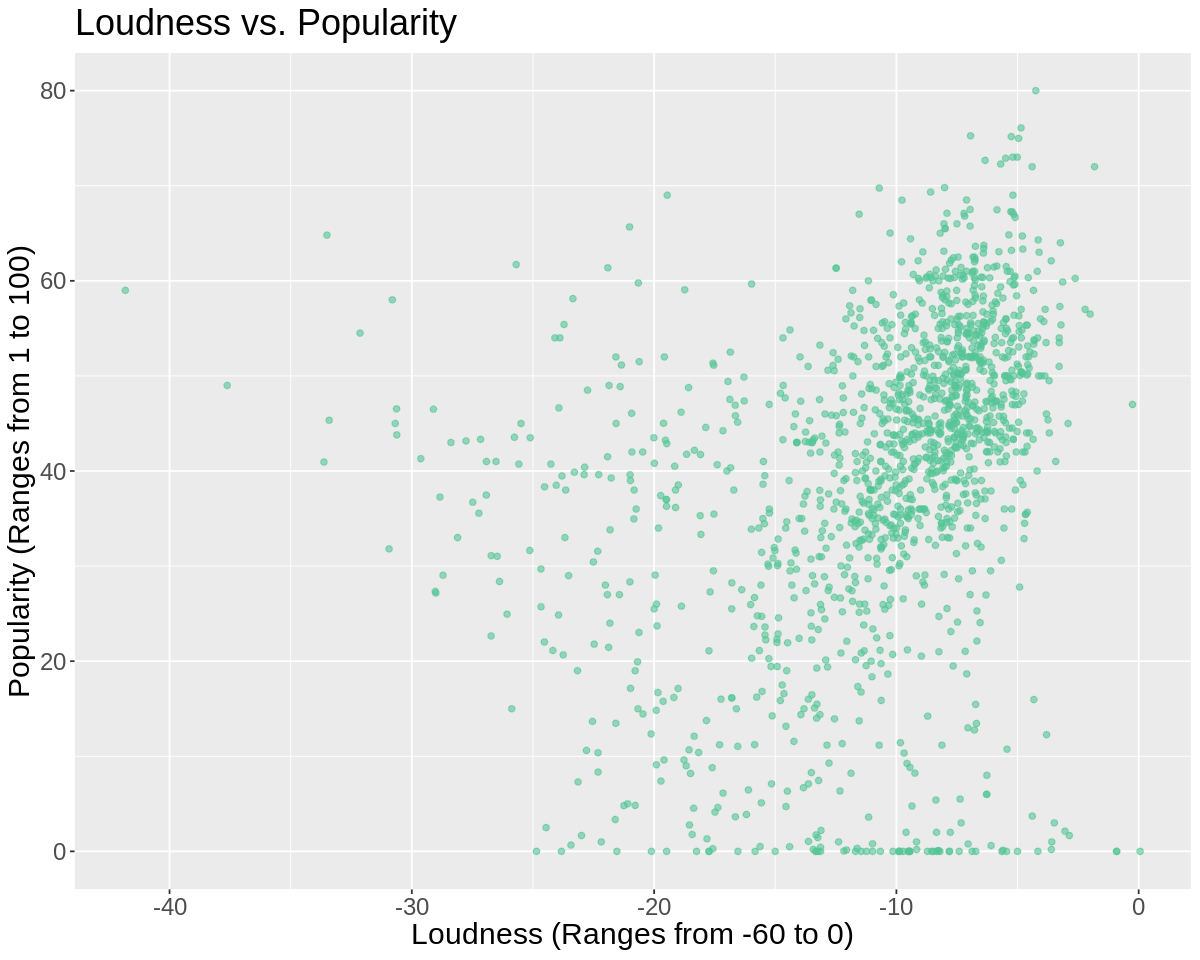

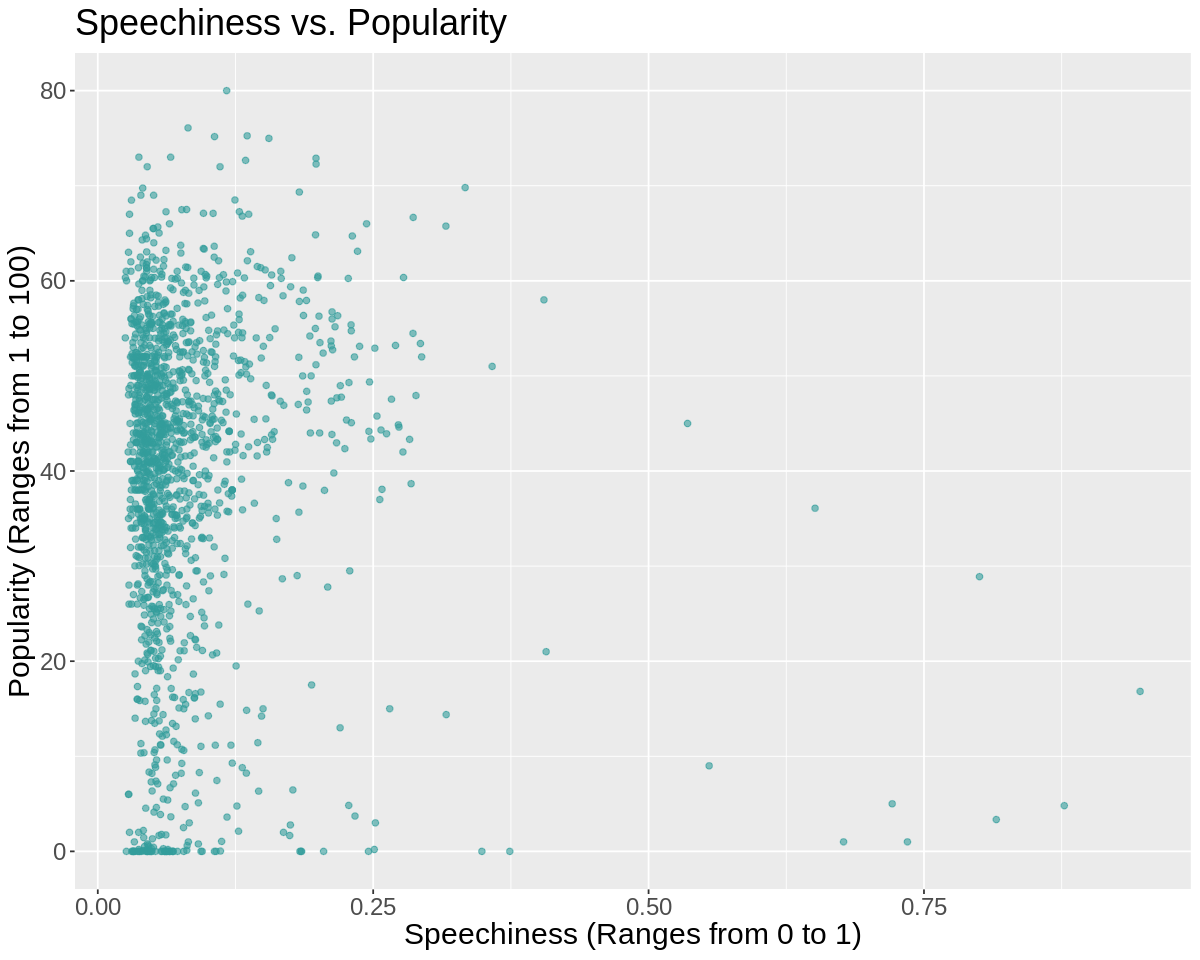

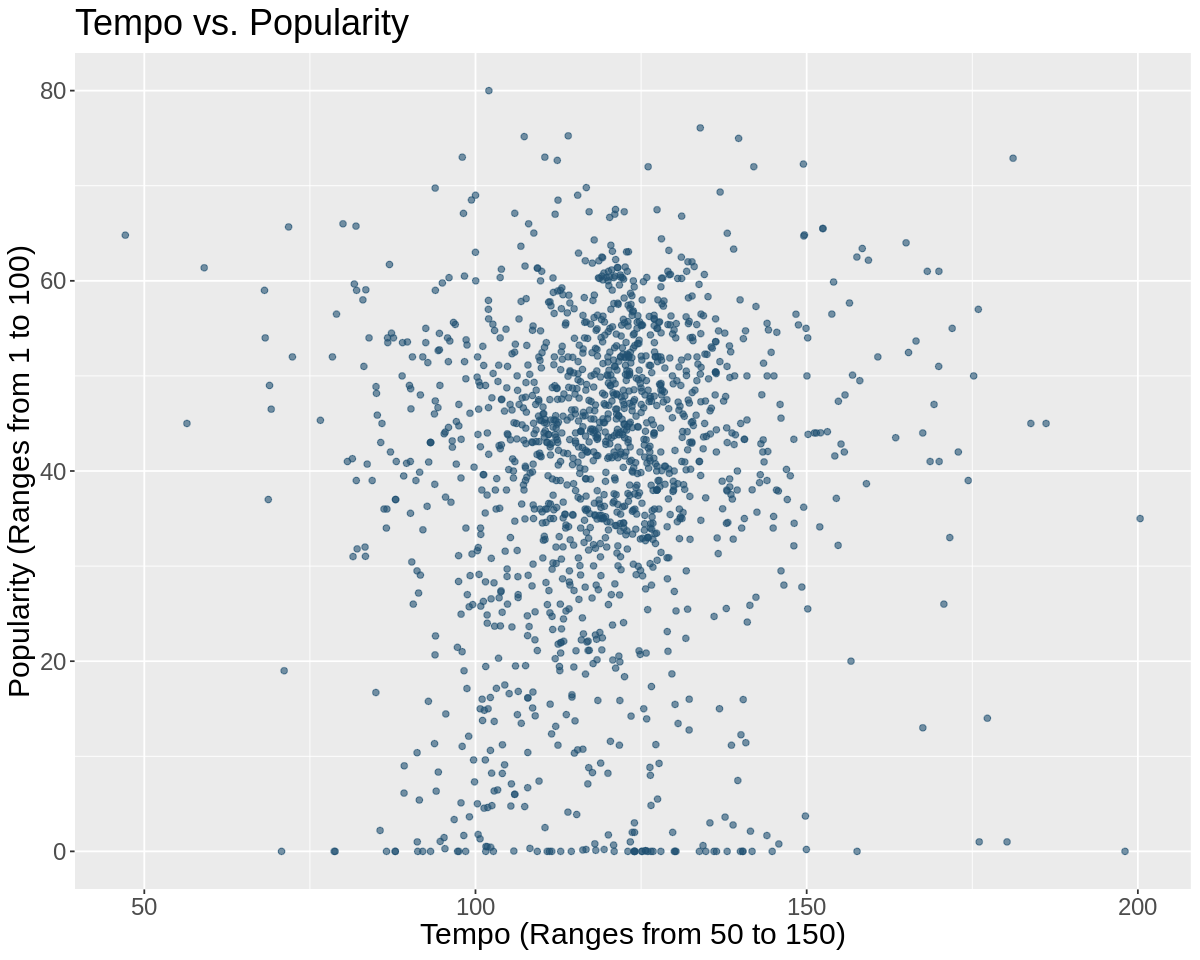

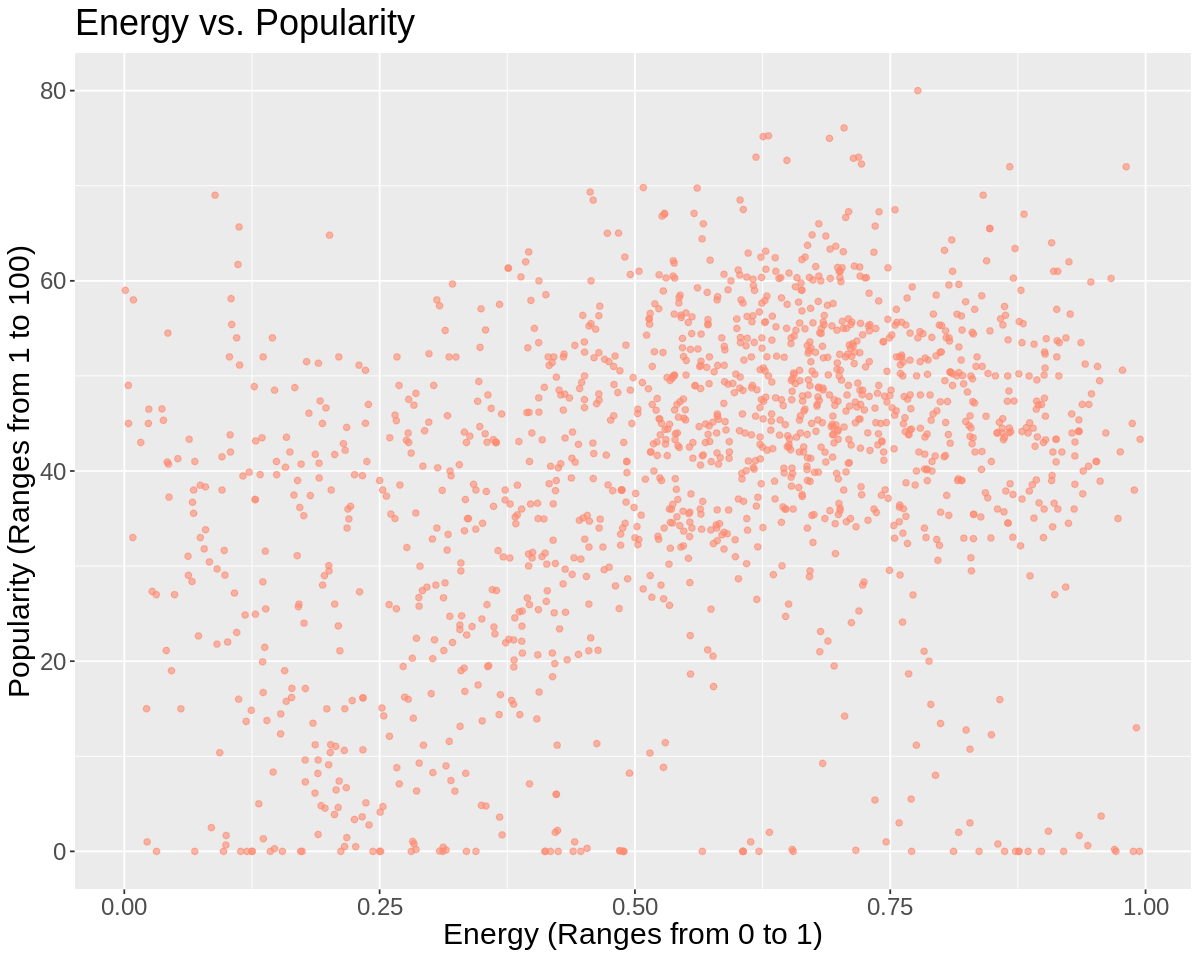

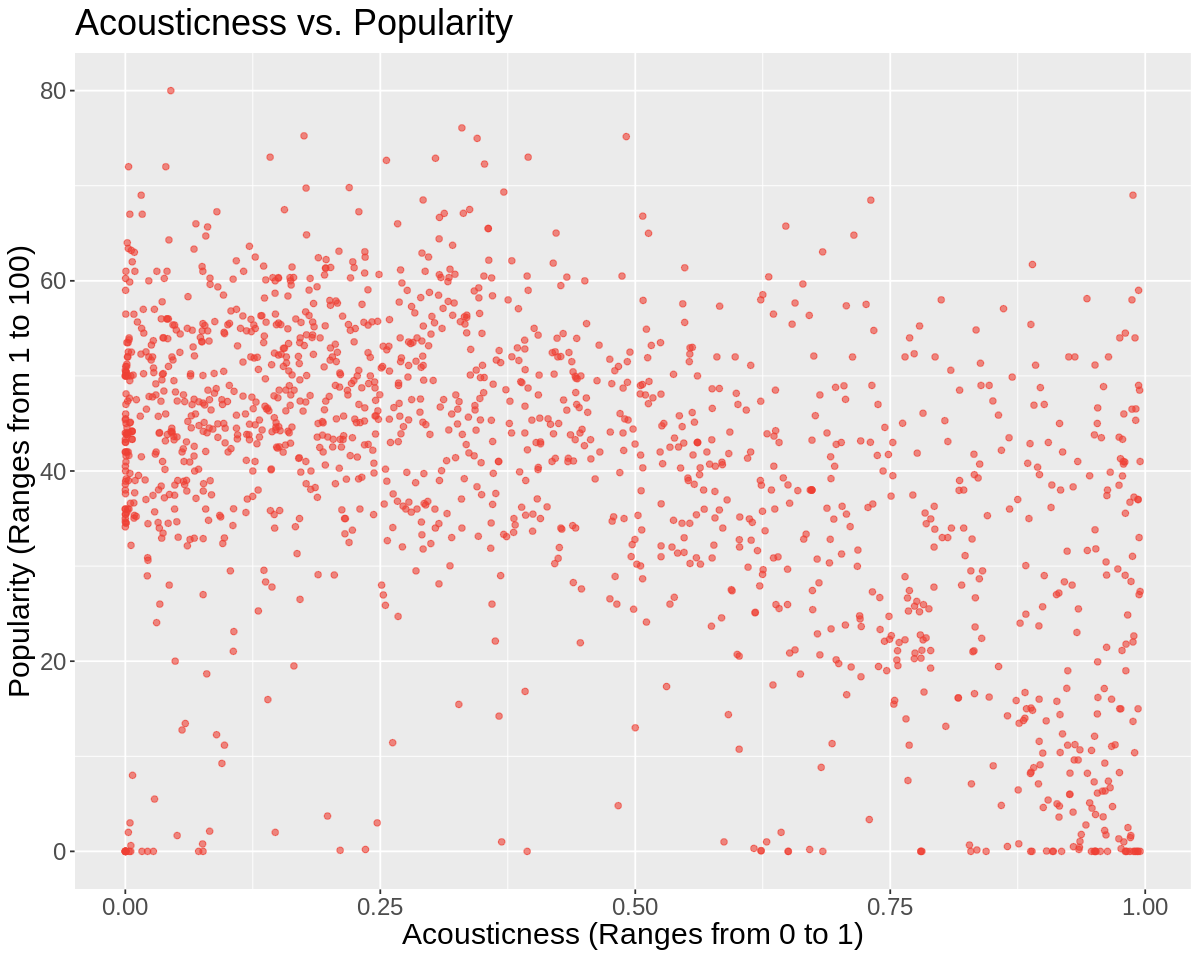

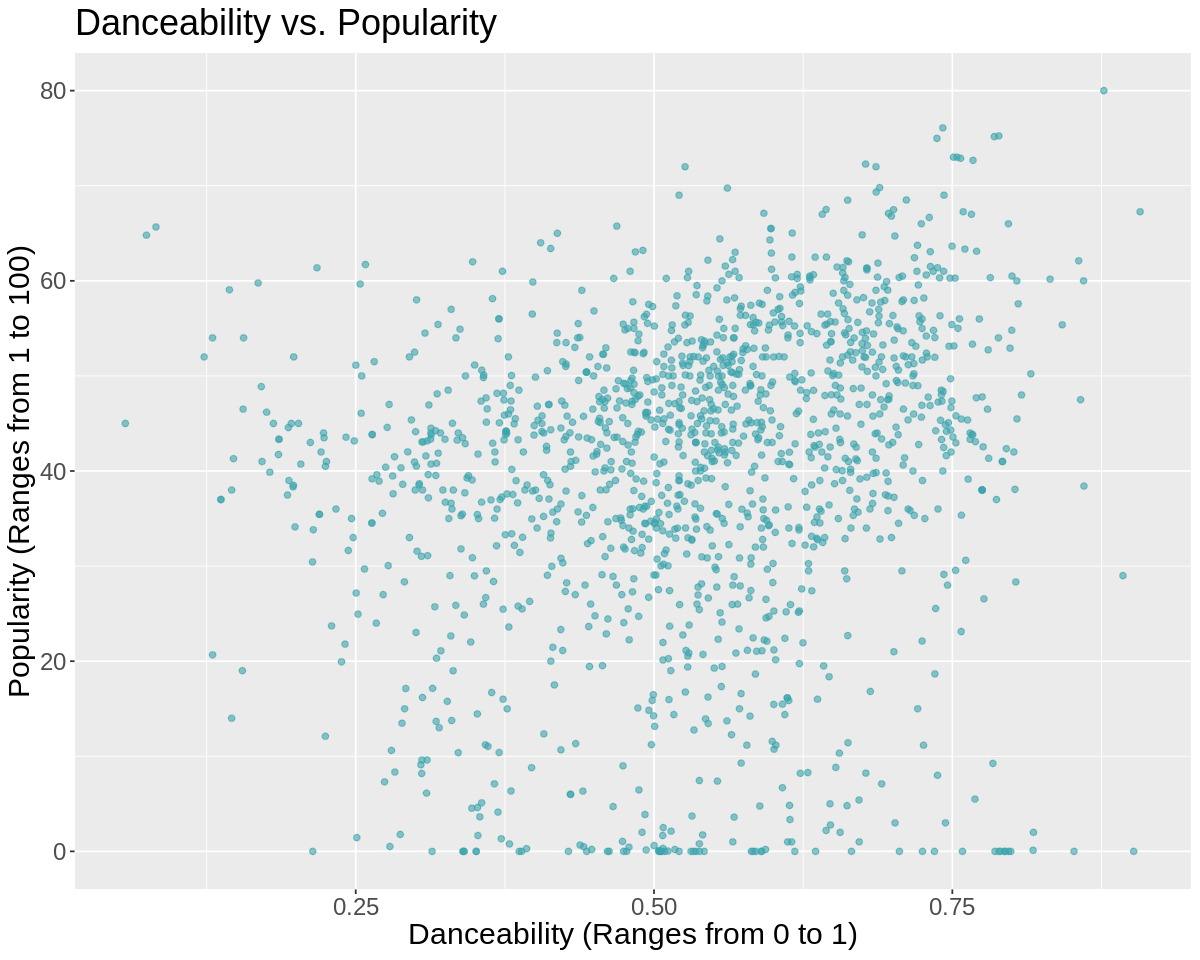

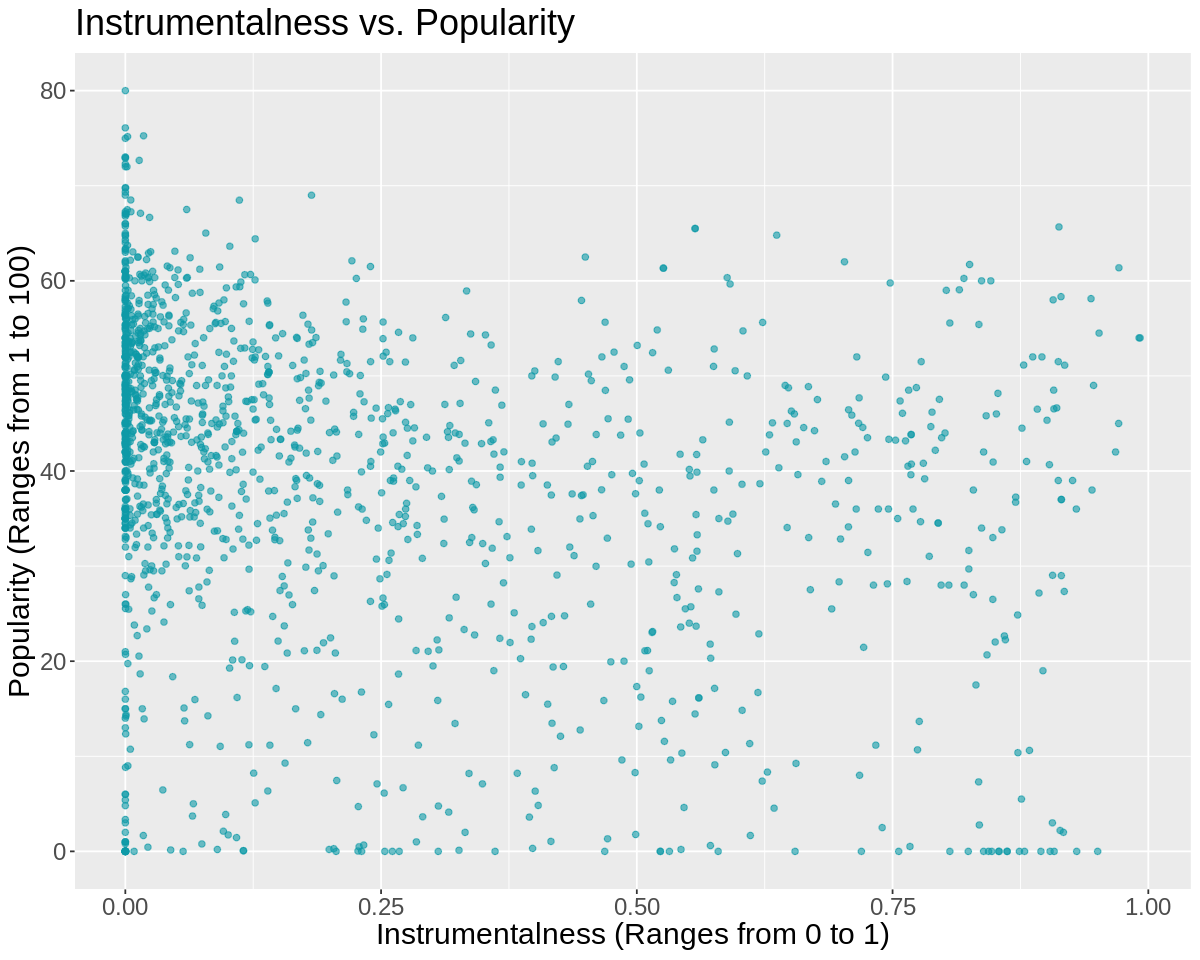

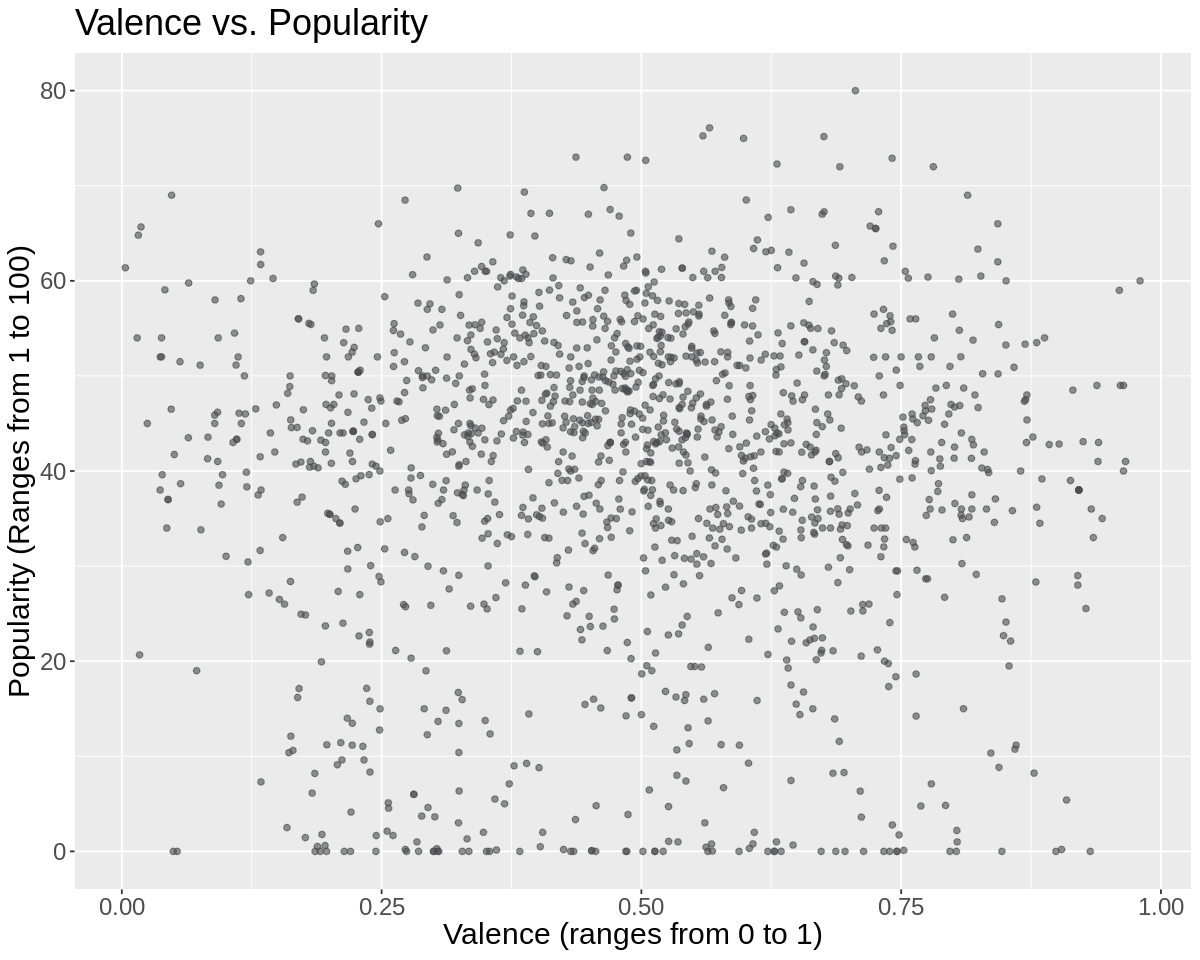

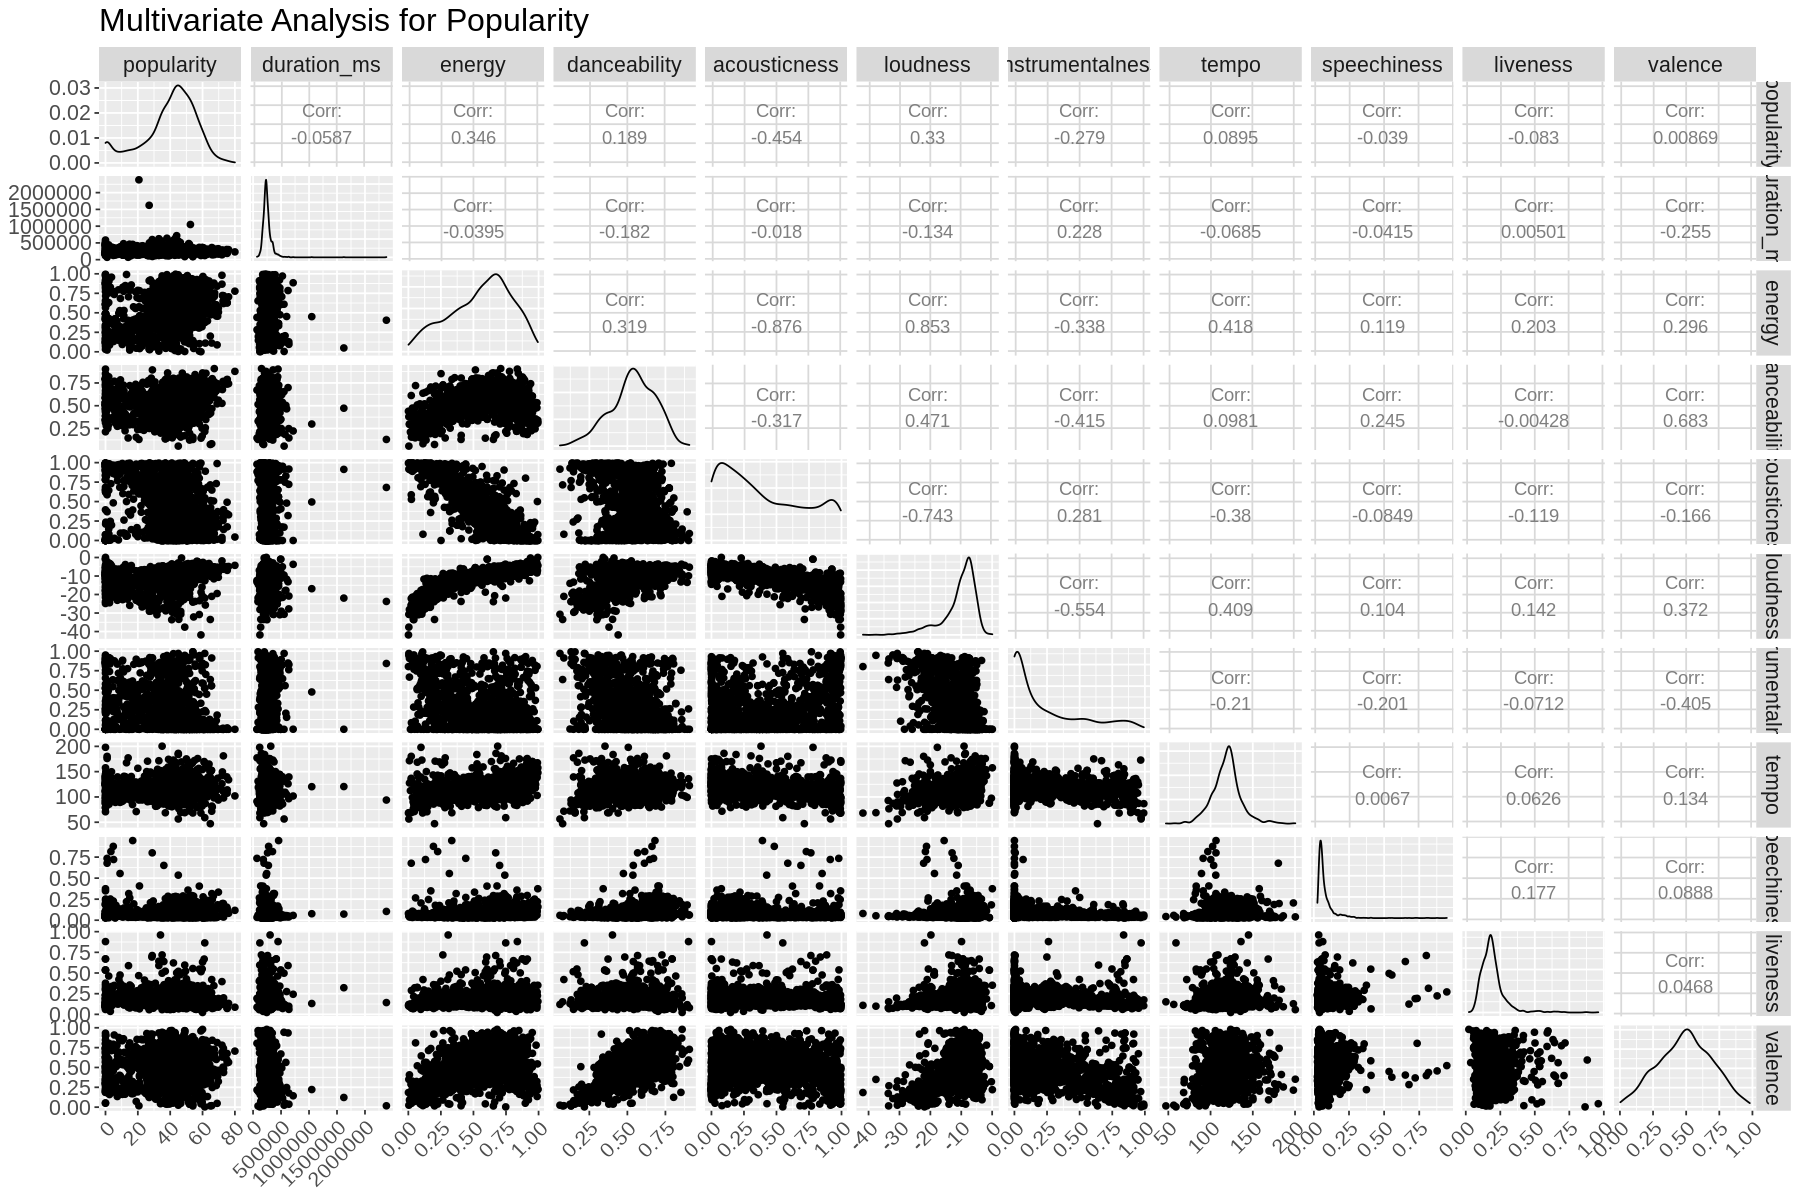

In [51]:
#Visualizations Relevant to Research

options(repr.plot.width=10, repr.plot.height=8)

duration_plot <- ggplot(popularity_training, aes(x = duration_ms, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Duration (ms, ranging from 200k to 300k)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Duration vs. Popularity"
        ) + theme(text = element_text(size = 18))

duration_plot #clear outlier (may need to delete)

liveness_plot <- ggplot(popularity_training, aes(x = liveness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Liveness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Liveness vs. Popularity"
        ) + theme(text = element_text(size = 18))

liveness_plot

loudness_plot <- ggplot(popularity_training, aes(x = loudness, y = popularity)) +
    geom_point(alpha=0.6, colour="#56C596") +
    labs(
        x="Loudness (Ranges from -60 to 0)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Loudness vs. Popularity"
        ) + theme(text = element_text(size = 18))

loudness_plot

speechiness_plot <- ggplot(popularity_training, aes(x = speechiness, y = popularity)) +
    geom_point(alpha=0.6, colour="#329D9C") +
    labs(
        x="Speechiness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Speechiness vs. Popularity"
        ) + theme(text = element_text(size = 18))

speechiness_plot

tempo_plot <- ggplot(popularity_training, aes(x = tempo, y = popularity)) +
    geom_point(alpha=0.6, colour="#205072") +
    labs(
        x="Tempo (Ranges from 50 to 150)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Tempo vs. Popularity"
        ) + theme(text = element_text(size = 18))

tempo_plot

energy_plot <- ggplot(popularity_training, aes(x = energy, y = popularity)) +
    geom_point(alpha=0.6, colour="#fe8a71") +
    labs(
        x="Energy (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Energy vs. Popularity"
        ) + theme(text = element_text(size = 18))

energy_plot

acousticness_plot <- ggplot(popularity_training, aes(x = acousticness, y = popularity)) +
    geom_point(alpha=0.6, colour="#ee4035") +
    labs(
        x="Acousticness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Acousticness vs. Popularity"
        ) + theme(text = element_text(size = 18))

acousticness_plot

danceability_plot <- ggplot(popularity_training, aes(x = danceability, y = popularity)) +
    geom_point(alpha=0.6, colour="#3da4ab") +
    labs(
        x="Danceability (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Danceability vs. Popularity"
        ) + theme(text = element_text(size = 18))

danceability_plot

instrumentalness_plot <- ggplot(popularity_training, aes(x = instrumentalness, y = popularity)) +
    geom_point(alpha=0.6, colour="#0e9aa7") +
    labs(
        x="Instrumentalness (Ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Instrumentalness vs. Popularity"
        ) + theme(text = element_text(size = 18))

instrumentalness_plot

valence_plot <- ggplot(popularity_training, aes(x = valence, y = popularity)) +
    geom_point(alpha=0.6, colour="#4a4e4d") +
    labs(
        x="Valence (ranges from 0 to 1)",
        y= "Popularity (Ranges from 1 to 100)",
        title= "Valence vs. Popularity"
        ) + theme(text = element_text(size = 18))

valence_plot

options(repr.plot.width=15, repr.plot.height=10)

library(GGally)
pair_plot <- popularity_training%>%
select(popularity, duration_ms, energy, danceability, acousticness, loudness, instrumentalness, tempo, speechiness,liveness, valence)%>%
ggpairs() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + theme(text = element_text(size = 16)) + ggtitle("Multivariate Analysis for Popularity")


pair_plot

In [6]:
set.seed(4002)

popularity_recipe = recipe(popularity ~ energy + acousticness + loudness, data = popularity_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

pop_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

pop_vfold = vfold_cv(popularity_training, v = 5, strata = popularity)

pop_wkflw = workflow() %>%
    add_recipe(popularity_recipe) %>%
    add_model(pop_spec)

pop_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
set.seed(4002)
gridvals = tibble(neighbors = seq(1,200))

pop_results = pop_wkflw %>%
    tune_grid(resamples = pop_vfold, grid = gridvals) %>%
    collect_metrics()
pop_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,16.8032097,5,0.37537788,Model001
1,rsq,standard,0.2567209,5,0.01829785,Model001
2,rmse,standard,14.7883540,5,0.43911185,Model002
2,rsq,standard,0.3142461,5,0.02799249,Model002
3,rmse,standard,14.1647392,5,0.35869572,Model003
3,rsq,standard,0.3395058,5,0.02477659,Model003
4,rmse,standard,13.8234462,5,0.35619904,Model004
4,rsq,standard,0.3572117,5,0.02550166,Model004
5,rmse,standard,13.6657782,5,0.33591373,Model005


In [8]:
pop_min = pop_results %>% 
    filter(.metric == "rmse") %>%
    arrange(mean) %>%
    slice(1)
pop_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,rmse,standard,13.2349,5,0.2527923,Model021


In [9]:
set.seed(4002)
kmin = pop_min %>%
    pull(neighbors)

pop_spec = nearest_neighbor(weight_func = "rectangular", neighbors = kmin) %>%
    set_engine("kknn") %>%
    set_mode("regression")

pop_fit = workflow() %>%
    add_recipe(popularity_recipe) %>%
    add_model(pop_spec) %>%
    fit(data = popularity_training)

pop_summary = pop_fit %>%
    predict(popularity_testing) %>%
    bind_cols(popularity_testing) %>%
    metrics(truth = popularity, estimate = .pred)

pop_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.2762836
rsq,standard,0.3645301
mae,standard,9.5227333
